# Project: Investigating Twitter Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction
### This Notebook will be used to explore the training dataset (The one provided in the pdf) for twitter data to clean and pre-proccess it :)

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#import statsmodels as sm
#%pip install tweepy
import tweepy


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
tweets = pd.read_csv('Training.csv')
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

### We can replace the first row with more relatable column names :)

In [3]:
tweets.columns = ['Polarity', 'Tweet_ID', 'Date', 'Query', 'User_name', 'Tweet']
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Polarity   1599999 non-null  int64 
 1   Tweet_ID   1599999 non-null  int64 
 2   Date       1599999 non-null  object
 3   Query      1599999 non-null  object
 4   User_name  1599999 non-null  object
 5   Tweet      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.8+ MB


In [4]:
tweets.head(10)

,Polarity,Tweet_ID,Date,Query,User_name,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


## Data Cleaning

In [5]:
def cleantweets(tweet_text):
    tweet_text = re.sub(r'@[A-Za-z0-9]+', '', tweet_text) # For Removing @ Mentions
    tweet_text = re.sub(r'#', '', tweet_text) # For Removing Hashtags
    tweet_text = re.sub(r'RT[\s]+', '', tweet_text) # For Removing Retweets
    tweet_text = re.sub(r'https?:\/\/\S+', '', tweet_text) # For Removing Hyperlinks
    return tweet_text

tweets['Tweet'] = tweets['Tweet'].apply(cleantweets)
tweets.head(10)


,Polarity,Tweet_ID,Date,Query,User_name,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"hey long time no see! Yes.. Rains a bit ,onl..."
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


<a id='eda'></a>
## Exploratory Data Analysis


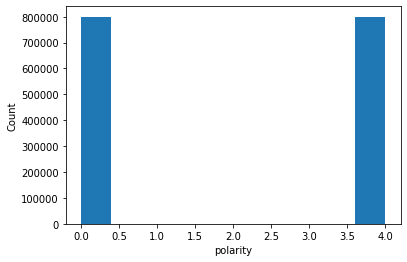

In [6]:
plt.hist(tweets['Polarity'])
plt.xlabel('polarity')
plt.ylabel('Count')
plt.show()

### Apparently the tweets in the dataset are either classefied as positive or negative and there is no neutral (Biased Dataset). Let's make sure of that by a simple query :) 

In [7]:
tweets[tweets['Polarity'] == 2].shape[0]

0

In [11]:
# For Scraping Twitter
def authentication():

    log = pd.read_csv('my keys.csv')
    consumer_key = log['Value'][0]
    consumer_secret = log['Value'][1]
    access_token = log['Value'][2]
    access_token_secret = log['Value'][3]

    autheticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
    autheticate.set_access_token(access_token, access_token_secret)
    api = tweepy.API(autheticate, wait_on_rate_limit= True)
    return api

authentication()
search_words = '#RobertDeNiro'
date_since = '2018-10-1'

#posts = tweepy.Cursor(authentication().search, q = search_words, lang = "en", since = date_since).items(1)
post = authentication().user_timeline(screen_name = 'ElonMusk', count = 1, lang = 'en')

In [12]:
# For Sentiment Analysis
def sentiment_scores(tweet):

    result = ''

 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(tweet)
    
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        result = 'Positive'
 
    elif sentiment_dict['compound'] <= - 0.05 :
        result = 'Negative'
 
    else :
        result = 'Neutral'
    
    return tweet, result


sentiment_scores(cleantweets(post[0].text))

('   🤣', 'Positive')

In [43]:
posts = authentication().user_timeline(screen_name = 'EmmaWatson', count = 100, lang = 'en')

tweets_dict = {'Positive': [], 'Negative': [], 'Neutral': []}

for i in range(len(posts[0:99])):
    tweet, sentiment = sentiment_scores(cleantweets(posts[i].text))
    tweets_dict[sentiment].append(tweet)


In [44]:
tweets_df = pd.DataFrame.from_dict(tweets_dict, orient = 'index')
tweets_df = tweets_df.transpose()
tweets_df.head(10)

,Positive,Negative,Neutral
0,"I am sending so much love to you, hoping you’r...",": Trans women pose no threat to cis women, but...",In the mean time please assume no news from me...
1,If I have news - I promise I’ll share it with ...,": ""Prior to the Covid-19 outbreak, as far as d...",Three Lessons From Adrienne Maree Brown's 'Eme...
2,"Dear Fans, \nRumours about whether I’m engaged...",: ALLFIE outraged as announces plan to create...,: Watch the new music video for “Brown Skin Gi...
3,"_App: You asked, we listened. Discover ethical...",: We signed this statement with &amp; othe...,": For just the third time in U.S. history, a w..."
4,: Polish opposition members of parliament coor...,: We are facing the 'decriminalisation of rape...,: Meet some of those calling to PressReset: _P...
5,": It’s time to PressReset, it’s time to change...",_ayub: 🚨PERSONAL ANNOUNCEMENT🚨\n\nIm humbled t...,": I've been plotting alongside Rebecca Solnit,..."
6,": Today, the SistersNotStrangers coalition pub...","_: Today, we're launching our petition demandi...",: I did this interview in response to topping ...
7,: We are SO excited to announce we are working...,": ""Selective amnesia about their own imperial ...","_: Today, with , we are launching a survey to ..."
8,": Over the past 18 months, FRIDA staff have en...",: Listen to Black ppl &amp; Black Muslims &amp...,: Blown away by the reviews for \n ⭐️⭐️⭐️⭐️\n ...
9,: The DEC is launching an urgent appeal to hel...,: 3/4 TBH365 is aimed at and builds on decade...,:


In [45]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Positive  45 non-null     object
 1   Negative  26 non-null     object
 2   Neutral   28 non-null     object
dtypes: object(3)
memory usage: 604.0+ bytes


In [35]:
tweets_main_df = pd.DataFrame()

In [46]:
tweets_main_df = tweets_main_df.append(tweets_df, ignore_index = True)

In [47]:
tweets_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Positive  105 non-null    object
 1   Negative  41 non-null     object
 2   Neutral   81 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB
